Saidhbhín Reid, 21364323


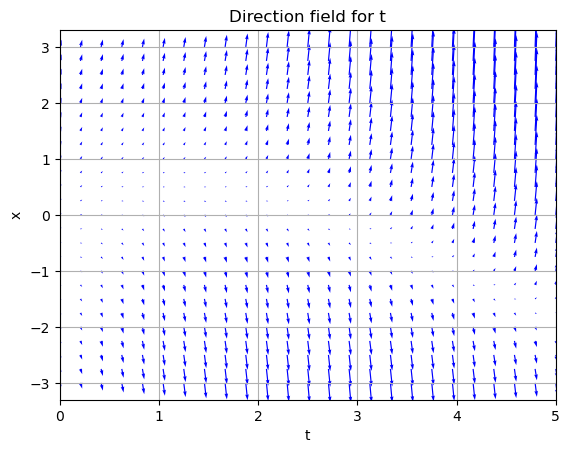

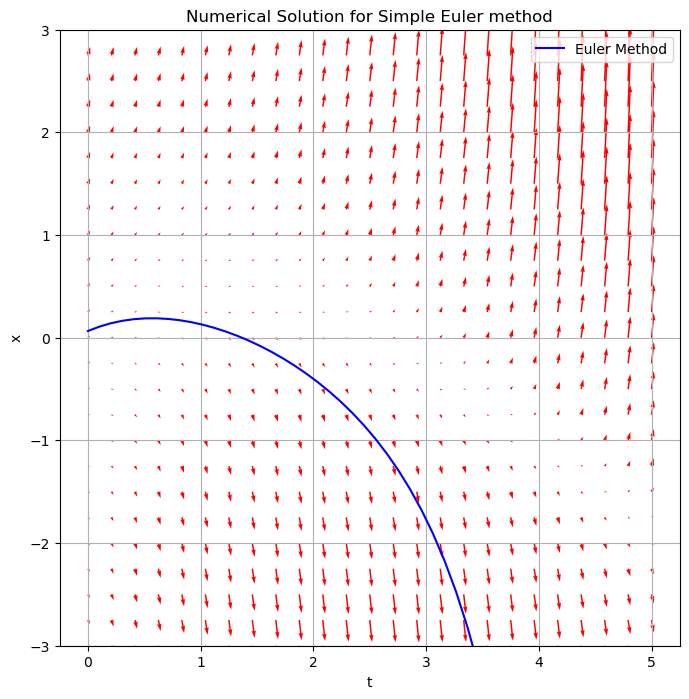

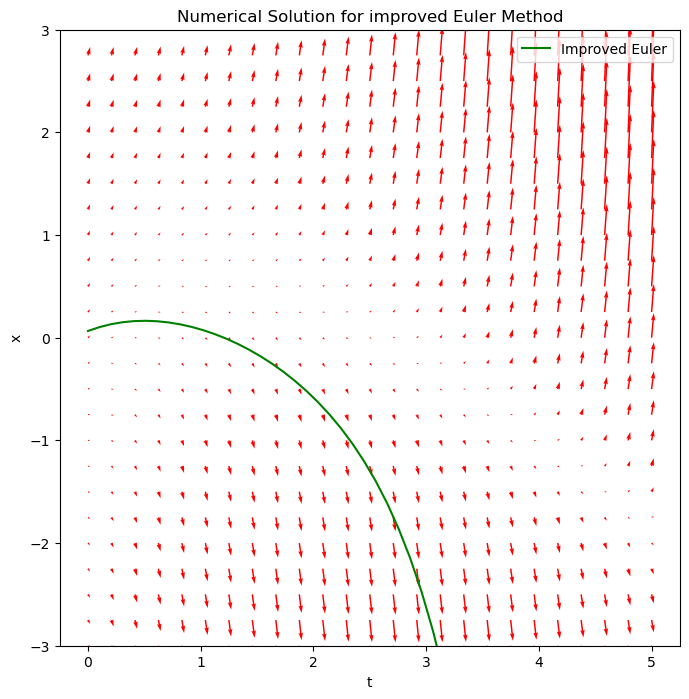

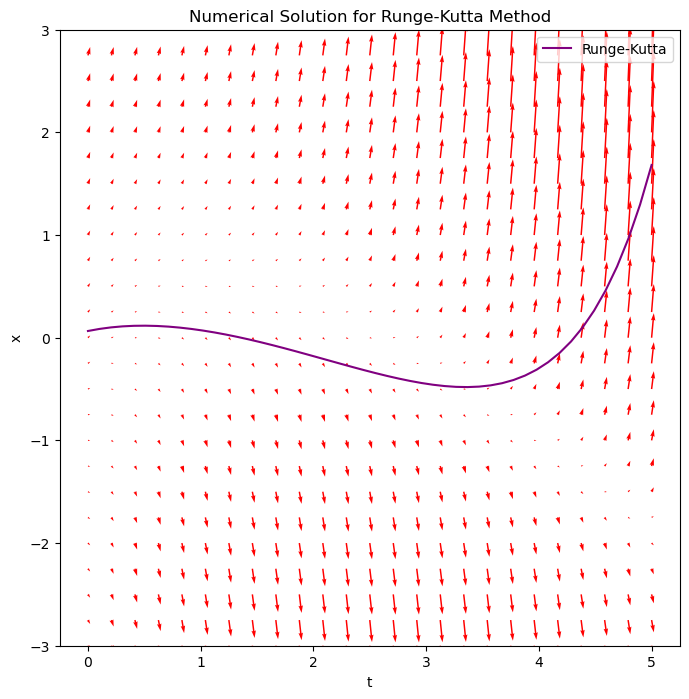

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 25 15:36:14 2023

@author: saidhbhinreid
"""

import numpy as np
import matplotlib.pyplot as plt


def func(x,t):
   return (1+t)*x+1-3*t+t**2


x=np.linspace(-3,3,25)
t_values=np.linspace(0,5,25)
T,X=np.meshgrid(t_values,x)
dxdt=func(X,T)
fig, ax = plt.subplots()
ax.quiver(T, X, np.ones_like(dxdt), dxdt, color='blue')
# plt.plot(t_values, x0, label='Numerical Solution', color='red')
plt.xlim(0,5)
plt.grid()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Direction field for t')
plt.show()

t = np.linspace(0, 5, 25)
x = np.linspace(-3, 3, 25)
T, X = np.meshgrid(t, x)





fig, ax = plt.subplots(figsize=(8, 8))
ax.quiver(T, X, np.ones_like(dxdt), dxdt, color='r')

x0 = 0.0655
step_size = 0.04
t_values = np.linspace(0, 5, 50)  
x_values = [x0]

for i in range(1, len(t_values)):
    x_new = x_values[-1] + step_size * func(x_values[-1], t_values[i-1])
    x_values.append(x_new)

ax.plot(t_values, x_values, label='Euler Method', color='b')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.legend()
plt.ylim(-3,3)
plt.title("Numerical Solution for Simple Euler method")
plt.grid()
plt.show()

x_values_improved_euler = [x0]

for i in range(1, len(t_values)):
    k1 = step_size * func(x_values_improved_euler[-1], t_values[i-1])
    k2 = step_size * func(x_values_improved_euler[-1] + k1, t_values[i])
    x_new = x_values_improved_euler[-1] + 0.5 * (k1 + k2)
    x_values_improved_euler.append(x_new)
fig, ax = plt.subplots(figsize=(8, 8))
ax.quiver(T, X, np.ones_like(dxdt), dxdt, color='r')
plt.ylim(-3,3)
plt.title('Numerical Solution for improved Euler Method')
plt.ylabel('x')
plt.xlabel('t')
ax.plot(t_values, x_values_improved_euler, label='Improved Euler', color='g')
plt.legend()
plt.show()

x_values_runge_kutta = [x0]
step_size=0.02
for i in range(1, len(t_values)):
    k1 = step_size * func(x_values_runge_kutta[-1], t_values[i-1])
    k2 = step_size * func(x_values_runge_kutta[-1] + 0.5 * k1, t_values[i-1] + 0.5 * step_size)
    k3 = step_size * func(x_values_runge_kutta[-1] + 0.5 * k2, t_values[i-1] + 0.5 * step_size)
    k4 = step_size * func(x_values_runge_kutta[-1] + k3, t_values[i])
    x_new = x_values_runge_kutta[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    x_values_runge_kutta.append(x_new)

fig, ax = plt.subplots(figsize=(8, 8))
ax.quiver(T, X, np.ones_like(dxdt), dxdt, color='r')
plt.title('Numerical Solution for Runge-Kutta Method')
plt.ylabel('x')
plt.xlabel('t')
plt.ylim(-3,3)
ax.plot(t_values, x_values_runge_kutta, label='Runge-Kutta', color='purple')
plt.legend()